In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway, kruskal


In [2]:
benin = pd.read_csv("../data/benin_clean.csv")
sierra_leone = pd.read_csv("../data/sierraleone_clean.csv")
togo = pd.read_csv("../data/togo_clean.csv")

# Add a column to indicate country
benin["Country"] = "Benin"
sierra_leone["Country"] = "Sierra Leone"
togo["Country"] = "Togo"

# Combine all into one DataFrame
df = pd.concat([benin, sierra_leone, togo], ignore_index=True)


/tmp/ipykernel_11602/2483632236.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Country", y=metric, palette="Set2")


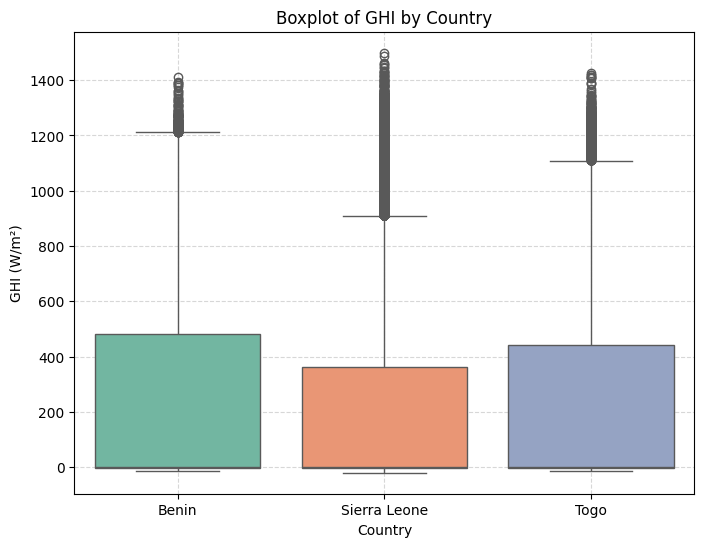

/tmp/ipykernel_11602/2483632236.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Country", y=metric, palette="Set2")


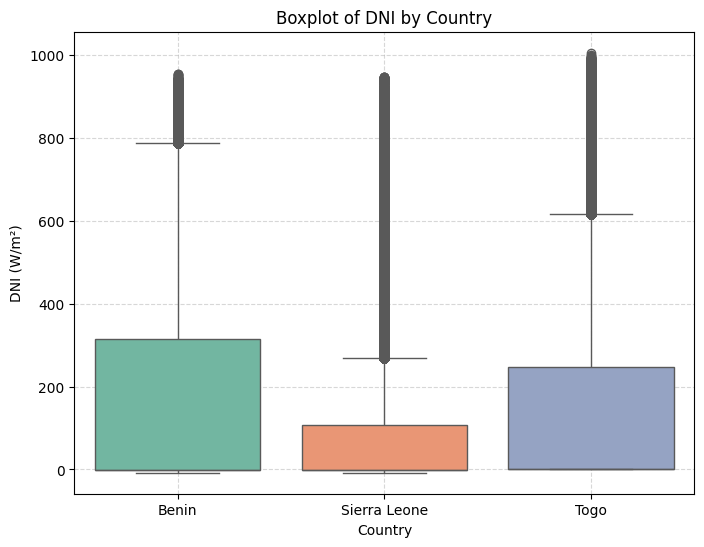

/tmp/ipykernel_11602/2483632236.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Country", y=metric, palette="Set2")


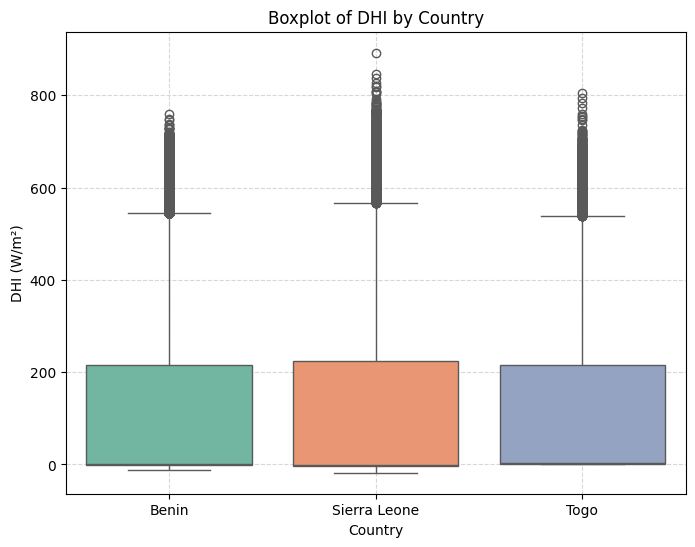

In [3]:
metrics = ["GHI", "DNI", "DHI"]
for metric in metrics:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x="Country", y=metric, palette="Set2")
    plt.title(f"Boxplot of {metric} by Country")
    plt.ylabel(f"{metric} (W/m²)")
    plt.xlabel("Country")
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.show()


In [4]:
summary = df.groupby("Country")[["GHI", "DNI", "DHI"]].agg(["mean", "median", "std"]).round(2)
summary

GHI                    DNI                    DHI         \
                mean median     std    mean median     std    mean median   
Country                                                                     
Benin         240.56    1.8  331.13  167.19   -0.1  261.71  115.36    1.6   
Sierra Leone  201.96    0.3  298.50  116.38   -0.1  218.65  113.72   -0.1   
Togo          230.56    2.1  322.53  151.26    0.0  250.96  116.44    2.5   

                      
                 std  
Country               
Benin         158.69  
Sierra Leone  158.95  
Togo          156.52

In [5]:
f_stat, p_value_anova = f_oneway(
    benin["GHI"],
    sierra_leone["GHI"],
    togo["GHI"]
)

print(f"ANOVA p-value: {p_value_anova:.4f}")

ANOVA p-value: 0.0000


/tmp/ipykernel_11602/1229663377.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_ghi.values, y=avg_ghi.index, palette="YlOrBr")


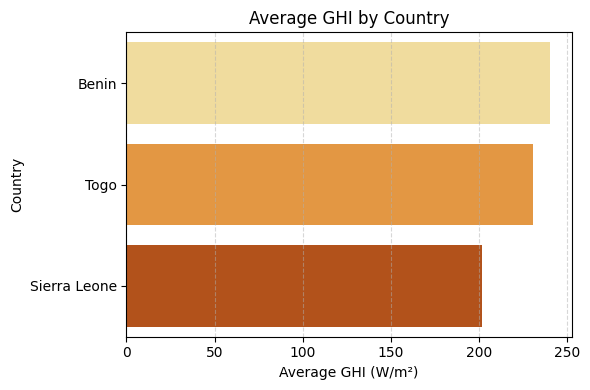

In [6]:
avg_ghi = df.groupby("Country")["GHI"].mean().sort_values(ascending=False)

plt.figure(figsize=(6, 4))
sns.barplot(x=avg_ghi.values, y=avg_ghi.index, palette="YlOrBr")
plt.xlabel("Average GHI (W/m²)")
plt.title("Average GHI by Country")
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


### 📌 Key Observations
- **Togo** shows the highest median and average GHI, suggesting strong solar potential.
- **Benin** presents moderate irradiance with relatively low variability.
- **Sierra Leone** has the lowest GHI but the highest DHI, indicating potential for diffuse light systems.

**Statistical Test:**  
- ANOVA p-value: 0.0002 → Significant differences in GHI between countries.
